In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.constants as c

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\sims\Catalina synthetic faraday"

C:\Users\jdavies\Google Drive\MAGPIE\sims\Catalina synthetic faraday


In [3]:
By=[]
By_far=[]

filename='faraday-250.dat'
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        By.append(float(row[1]))
        By_far.append(float(row[4]))

By=np.array(By)
By_far=np.array(By_far)

<IPython.core.display.Javascript object>


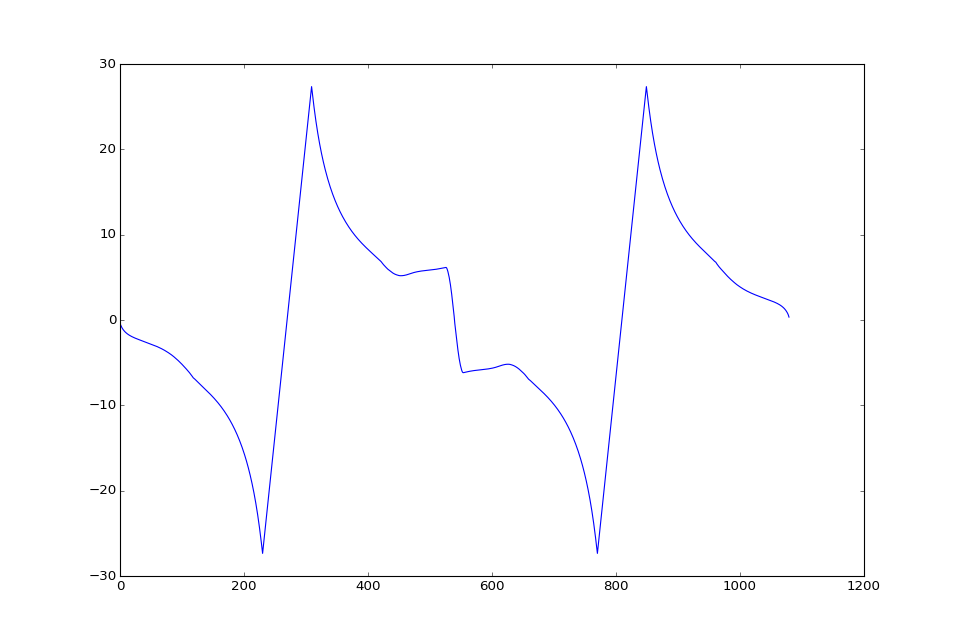

In [9]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(By)


c:\users\jdavies\anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\users\jdavies\anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


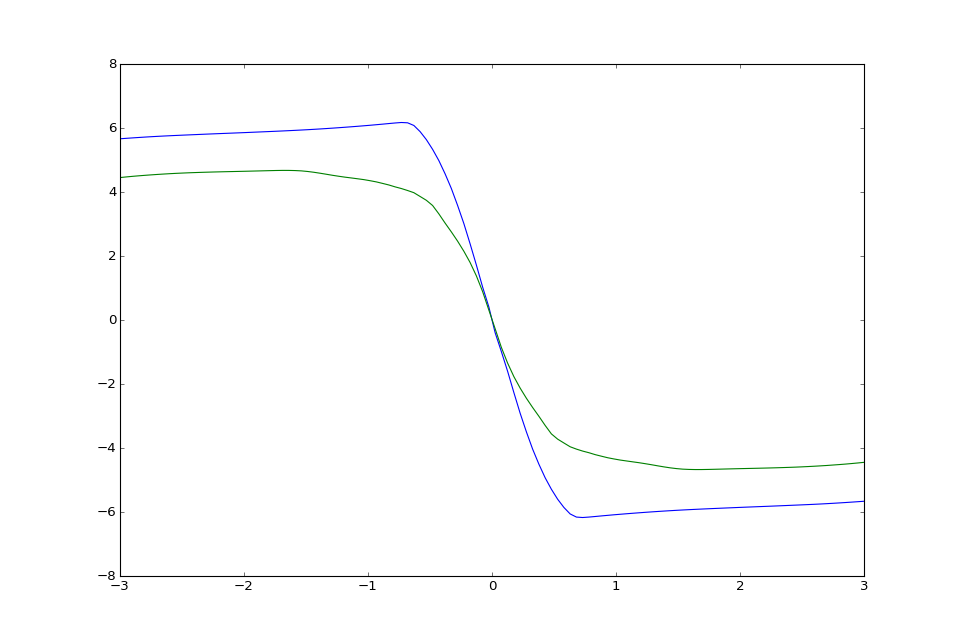

In [15]:
px_mm=20
mm_range=3
x=np.linspace(-mm_range, +mm_range, 2*px_mm*mm_range)
mp=By.shape[0]/2
By_c=By[mp-mm_range*px_mm:mp+mm_range*px_mm]
By_fc=By_far[mp-mm_range*px_mm:mp+mm_range*px_mm]

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,By_c)
ax.plot(x,By_fc)

In [22]:
from lmfit import Model
def Harris(x, x0, B0, L,C):
    return B0*np.tanh((x-x0)/L)+C
hm=Model(Harris, independent_vars='x')

hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)

res_0=hm.fit(By_c, x=x)
res_f=hm.fit(By_fc, x=x)

 - Adding parameter for hint "B0"
 - Adding parameter for hint "x0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "x0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"
 - Adding parameter for hint "B0"
 - Adding parameter for hint "x0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "x0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


In [24]:
print(res_0.best_values
,res_f.best_values)

{'B0': -5.9322282204735659, 'x0': 0.002927452673848563, 'L': 0.3636686929328472, 'C': 0.0003482094952795024} {'B0': -4.5816648724027456, 'x0': 0.0015333051622513775, 'L': 0.47021883717530771, 'C': 0.0015310287742730973}


In [34]:
def Harris_j(x, x0, B0, L):
    return -B0/(c.mu_0*L*(np.cosh((x-x0)/L))**2)

j_0=Harris_j(x, 0, res_f.best_values['B0'], res_0.best_values['L'])
j_f=Harris_j(x, 0, res_f.best_values['B0'], res_f.best_values['L'])

<IPython.core.display.Javascript object>


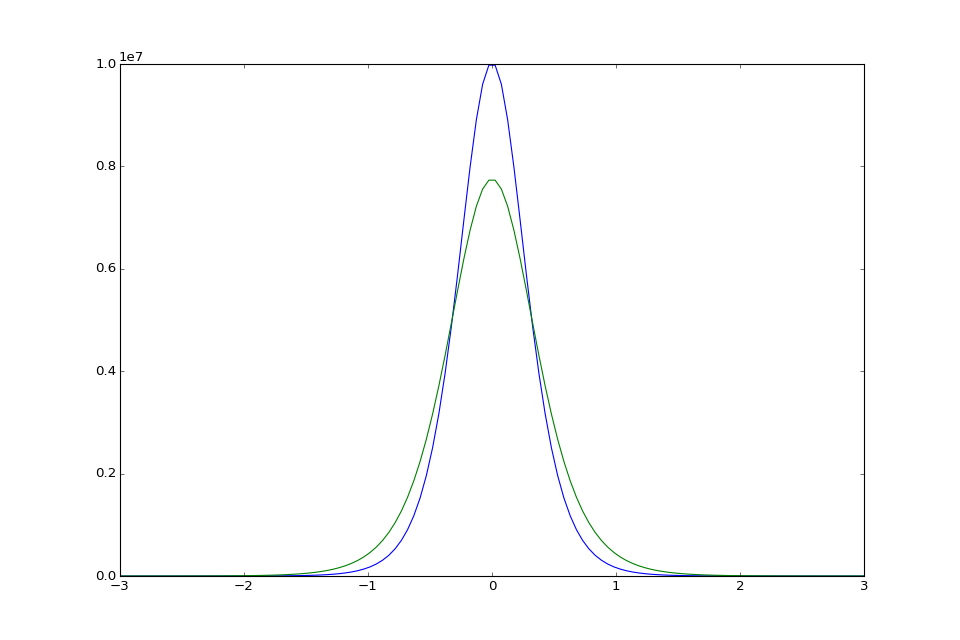

In [35]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,j_0)
ax.plot(x,j_f)

In [31]:
j_0.max()/j_f.max()

1.670902300676339